## PHASE 1: Load & Explore the Datasets

In [1]:
import pandas as pd

# Load the datasets
nutrition_df = pd.read_csv("daily_food_nutrition_dataset.csv")
exercise_df = pd.read_csv("exercise_dataset.csv")

# Preview the first 5 rows of each
print("📄 Nutrition Dataset:")
display(nutrition_df.head())


📄 Nutrition Dataset:


,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [3]:
print("\n📄 Exercise Dataset:")
display(exercise_df.head())


📄 Exercise Dataset:


,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [5]:
print("📄 Nutrition Dataset Info:")
nutrition_df.info()

print("\n📄 Exercise Dataset Info:")
exercise_df.info()

📄 Nutrition Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB

📄 Exercise Dataset Info:
<class 'pa

In [7]:
# Drop unnecessary column
exercise_df.drop(columns=['ID'], inplace=True)

# Rename for clarity
exercise_df.rename(columns={'Calories Burn': 'Calories Burned'}, inplace=True)

# Optional: convert date to datetime in nutrition dataset
nutrition_df['Date'] = pd.to_datetime(nutrition_df['Date'])

# Confirm changes
print("🔧 Column names after cleaning:")
print("Nutrition Dataset:", nutrition_df.columns.tolist())
print("Exercise Dataset:", exercise_df.columns.tolist())


🔧 Column names after cleaning:
Nutrition Dataset: ['Date', 'User_ID', 'Food_Item', 'Category', 'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Meal_Type', 'Water_Intake (ml)']
Exercise Dataset: ['Exercise', 'Calories Burned', 'Dream Weight', 'Actual Weight', 'Age', 'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions', 'Exercise Intensity']


In [11]:
# Check for nulls again (final check)
print("Missing values in Nutrition Dataset:")
print(nutrition_df.isnull().sum())

print("\nMissing values in Exercise Dataset:")
print(exercise_df.isnull().sum())


Missing values in Nutrition Dataset:
Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64

Missing values in Exercise Dataset:
Exercise              0
Calories Burned       0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64


In [15]:
# Descriptive stats for Nutrition Dataset
print("Nutrition Dataset Statistics:")
display(nutrition_df.describe())

# Descriptive stats for Exercise Dataset
print("\nExercise Dataset Statistics:")
display(exercise_df.describe())


Nutrition Dataset Statistics:


,Date,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-07-01 02:49:37.920000,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
min,2024-01-01 00:00:00,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,2024-04-02 00:00:00,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,2024-06-30 12:00:00,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,2024-09-29 00:00:00,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,2024-12-31 00:00:00,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000
std,NaN,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642



Exercise Dataset Statistics:


,Calories Burned,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


## PHASE 2: EDA

### Step 2.1: EDA – Nutrition Dataset

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for better visuals
sns.set(style="whitegrid")


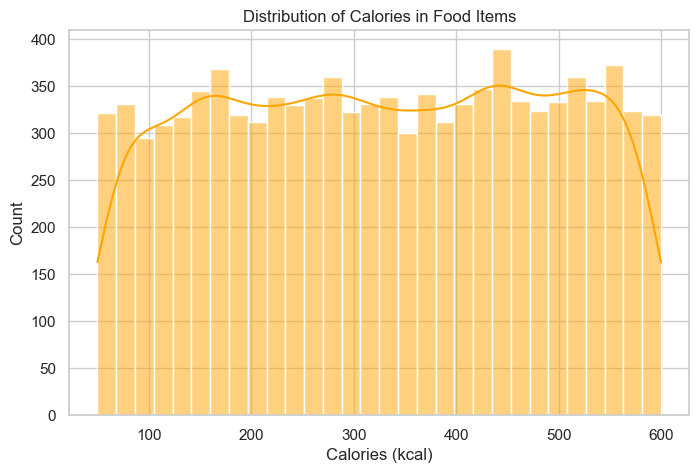

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(nutrition_df['Calories (kcal)'], bins=30, kde=True, color='orange')
plt.title("Distribution of Calories in Food Items")
plt.xlabel("Calories (kcal)")
plt.ylabel("Count")
plt.show()


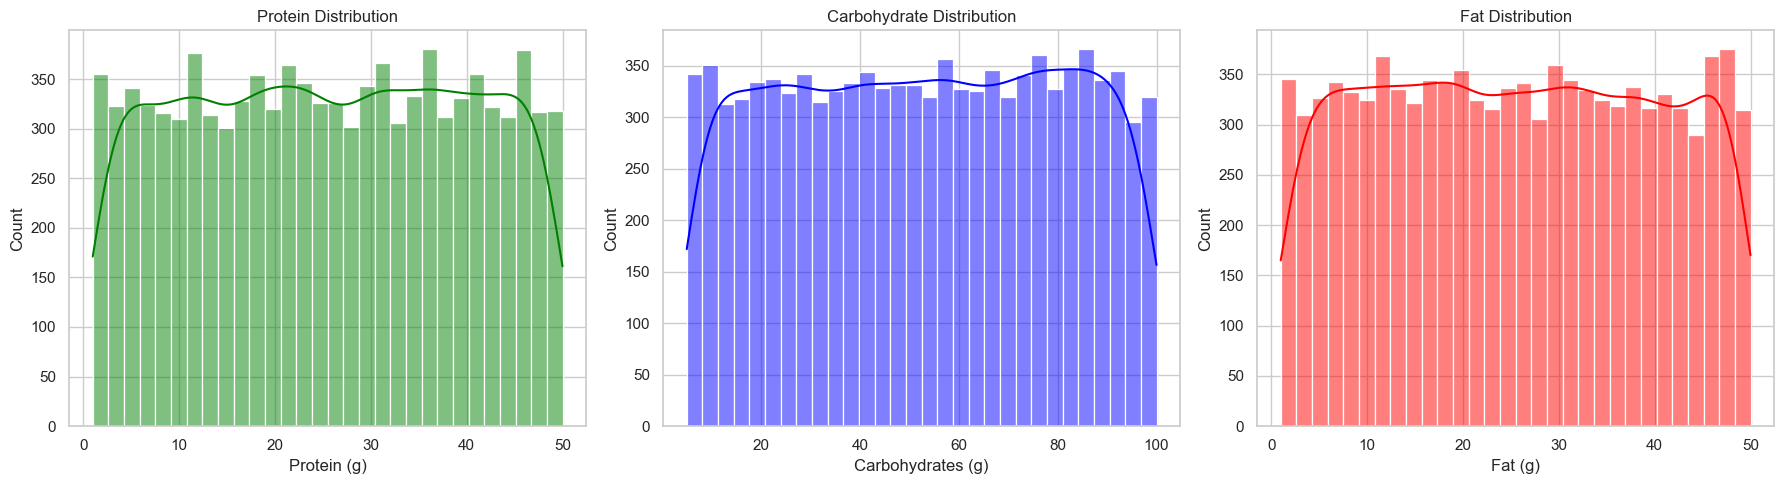

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(nutrition_df['Protein (g)'], bins=30, kde=True, ax=axes[0], color='green')
axes[0].set_title('Protein Distribution')

sns.histplot(nutrition_df['Carbohydrates (g)'], bins=30, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Carbohydrate Distribution')

sns.histplot(nutrition_df['Fat (g)'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Fat Distribution')

plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_21360\3931204657.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=nutrition_df, x='Meal_Type', y='Calories (kcal)', estimator='mean', ci=None, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_21360\3931204657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nutrition_df, x='Meal_Type', y='Calories (kcal)', estimator='mean', ci=None, palette='Set2')


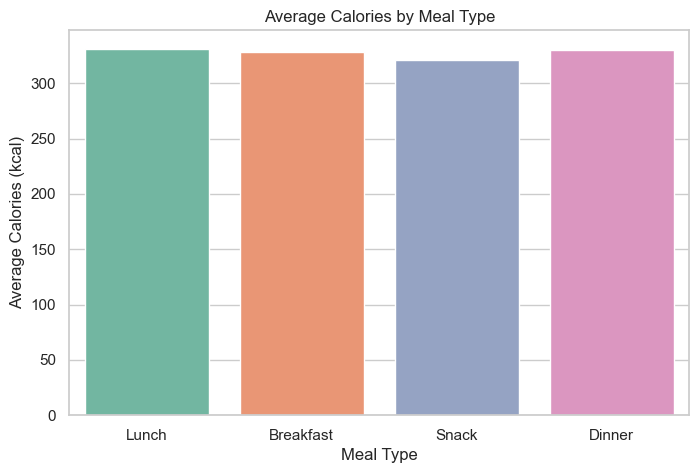

C:\Users\hp\AppData\Local\Temp\ipykernel_21360\3215751932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_foods.index, y=top_foods.values, palette='Spectral')


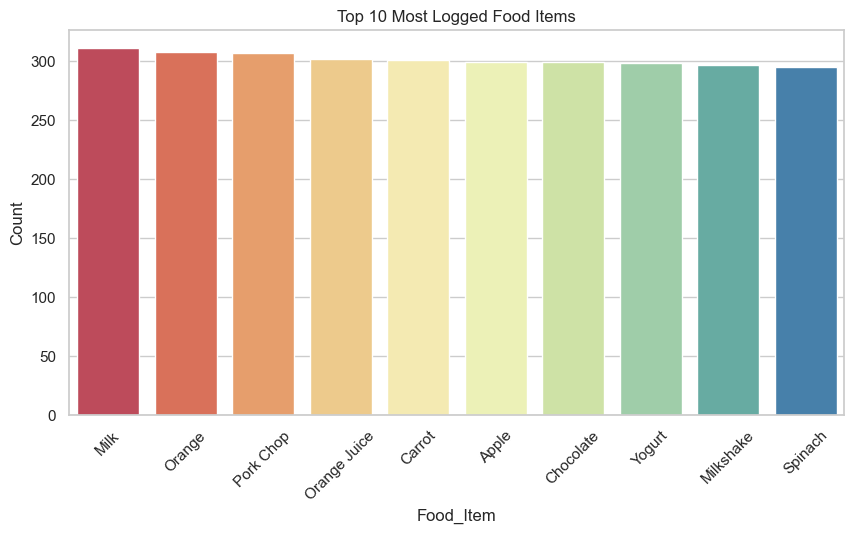

In [28]:
plt.figure(figsize=(10,5))
top_foods = nutrition_df['Food_Item'].value_counts().head(10)
sns.barplot(x=top_foods.index, y=top_foods.values, palette='Spectral')
plt.title("Top 10 Most Logged Food Items")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


### Step 2.2: EDA – Exercise Dataset

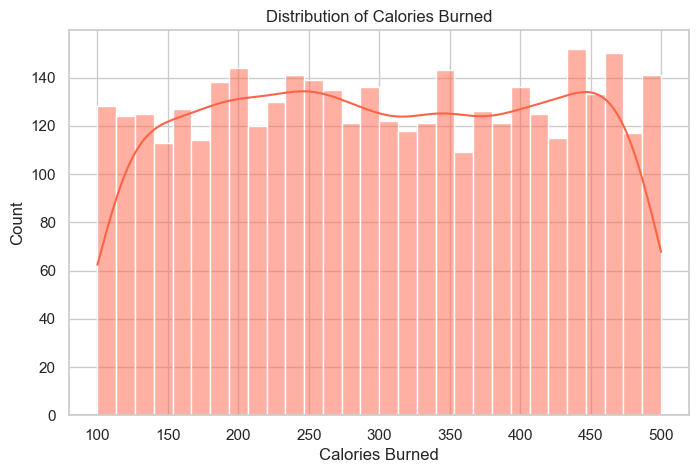

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(exercise_df['Calories Burned'], bins=30, kde=True, color='tomato')
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Count")
plt.show()


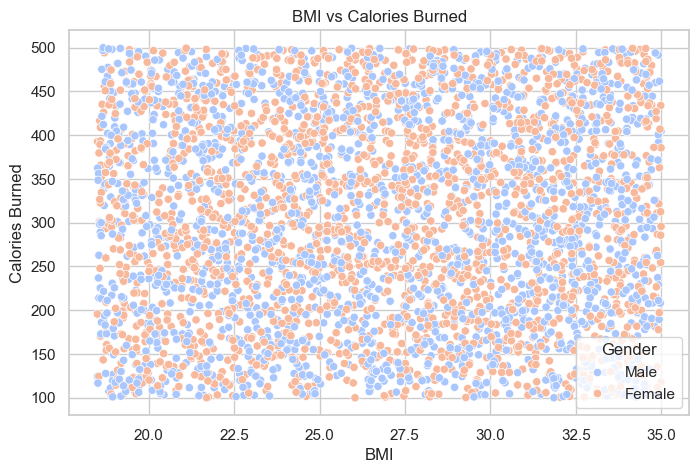

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=exercise_df, x='BMI', y='Calories Burned', hue='Gender', palette='coolwarm')
plt.title("BMI vs Calories Burned")
plt.xlabel("BMI")
plt.ylabel("Calories Burned")
plt.legend(title='Gender')
plt.show()


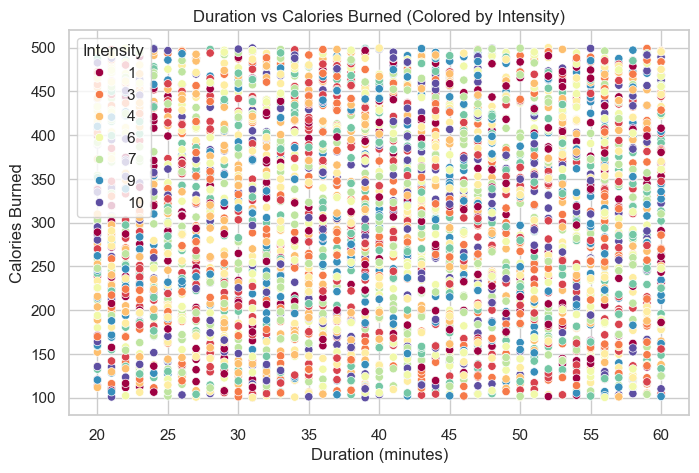

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=exercise_df, x='Duration', y='Calories Burned', hue='Exercise Intensity', palette='Spectral')
plt.title("Duration vs Calories Burned (Colored by Intensity)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burned")
plt.legend(title="Intensity")
plt.show()


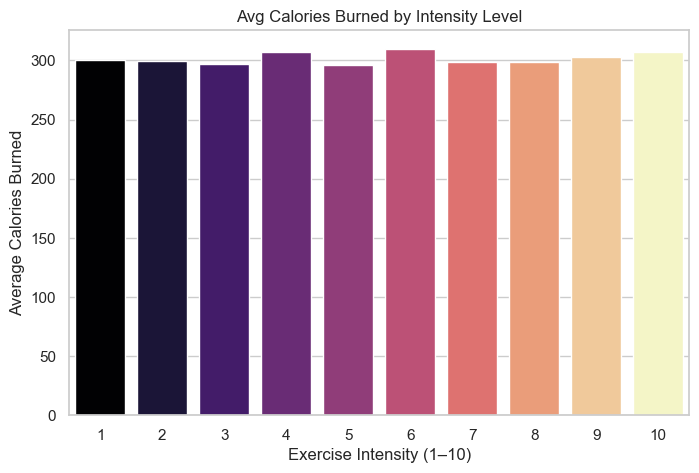

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=exercise_df, x='Exercise Intensity', y='Calories Burned', estimator='mean', errorbar=None, hue='Exercise Intensity', palette='magma', legend=False)
plt.title("Avg Calories Burned by Intensity Level")
plt.ylabel("Average Calories Burned")
plt.xlabel("Exercise Intensity (1–10)")
plt.show()


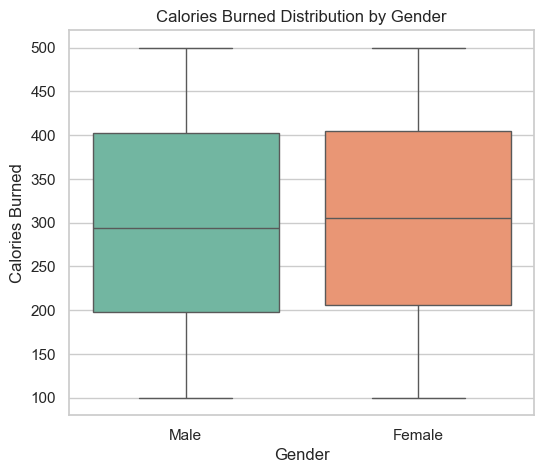

In [45]:
plt.figure(figsize=(6,5))
sns.boxplot(data=exercise_df, x='Gender', y='Calories Burned', hue='Gender', palette='Set2', legend=False)
plt.title("Calories Burned Distribution by Gender")
plt.ylabel("Calories Burned")
plt.xlabel("Gender")
plt.show()


## PHASE 3 – Feature Engineering & Synthetic Data

In [48]:
# Define goal tagging function
def determine_goal(row):
    diff = row['Dream Weight'] - row['Actual Weight']
    if abs(diff) <= 2:
        return 'Maintain'
    elif diff > 2:
        return 'Gain'
    else:
        return 'Loss'

# Apply to dataframe
exercise_df['Goal'] = exercise_df.apply(determine_goal, axis=1)

# Preview
exercise_df[['Dream Weight', 'Actual Weight', 'Goal']].head()


,Dream Weight,Actual Weight,Goal
0,91.892531,96.301115,Loss
1,64.165097,61.104668,Gain
2,70.846224,71.766724,Maintain
3,79.477008,82.984456,Loss
4,89.960226,85.643174,Gain


In [50]:
# Define BMI category
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply to dataframe
exercise_df['BMI_Category'] = exercise_df['BMI'].apply(get_bmi_category)

# Preview
exercise_df[['BMI', 'BMI_Category']].head()


,BMI,BMI_Category
0,29.426275,Overweight
1,21.286346,Normal
2,27.899592,Overweight
3,33.729552,Obese
4,23.286113,Normal


In [52]:
import numpy as np

# Generate synthetic user IDs matching the nutrition dataset range (1 to 1000)
np.random.seed(42)
exercise_df['User_ID'] = np.random.randint(1, 1001, size=len(exercise_df))

# Preview
exercise_df[['User_ID', 'Goal', 'BMI_Category']].head()


,User_ID,Goal,BMI_Category
0,103,Loss,Overweight
1,436,Gain,Normal
2,861,Maintain,Overweight
3,271,Loss,Obese
4,107,Gain,Normal


In [54]:
# Set seed for reproducibility
np.random.seed(42)

# Define options
fitness_levels = ['Beginner', 'Intermediate', 'Advanced']
diet_types = ['Balanced', 'Low-Carb', 'High-Protein', 'Vegan']

# Randomly assign
exercise_df['Fitness_Level'] = np.random.choice(fitness_levels, size=len(exercise_df))
exercise_df['Diet_Type'] = np.random.choice(diet_types, size=len(exercise_df))

# Preview
exercise_df[['User_ID', 'Fitness_Level', 'Diet_Type']].head()


,User_ID,Fitness_Level,Diet_Type
0,103,Advanced,Balanced
1,436,Beginner,High-Protein
2,861,Advanced,Balanced
3,271,Advanced,Balanced
4,107,Beginner,Low-Carb


## Phase 4 – Merge Nutrition & Exercise Data

In [56]:
# Merge both datasets on User_ID
merged_df = pd.merge(nutrition_df, exercise_df, on='User_ID', how='left')

# Check merged result
merged_df.head()


,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),...,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity,Goal,BMI_Category,Fitness_Level,Diet_Type
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,...,Male,58.0,155.0,32.476621,Sunny,7.0,Maintain,Obese,Beginner,High-Protein
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,...,Male,25.0,170.0,18.945215,Cloudy,5.0,Loss,Normal,Advanced,Balanced
2,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,...,Female,29.0,115.0,20.657160,Cloudy,8.0,Maintain,Normal,Intermediate,Vegan
3,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,...,Male,21.0,148.0,30.420056,Rainy,6.0,Maintain,Obese,Intermediate,Low-Carb
4,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,...,Male,33.0,167.0,33.051590,Cloudy,7.0,Loss,Obese,Beginner,Low-Carb


## Phase 5 – Scaling & Preprocessing (for Model/Flask Logic)

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns to scale
cols_to_scale = [
    'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
    'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)',
    'Water_Intake (ml)', 'Calories Burned', 'Dream Weight', 'Actual Weight',
    'Duration', 'Heart Rate', 'BMI'
]

# Initialize and apply scaler
scaler = MinMaxScaler()
merged_df[cols_to_scale] = scaler.fit_transform(merged_df[cols_to_scale])

# Preview scaled result
merged_df[cols_to_scale].head()


,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml),Calories Burned,Dream Weight,Actual Weight,Duration,Heart Rate,BMI
0,0.223636,0.844898,0.828421,0.010204,0.15,0.254,0.752,0.416667,0.420000,0.572880,0.884236,0.857404,0.950,0.6875,0.847240
1,0.029091,0.779592,0.092632,0.044898,0.26,0.244,0.680,0.323333,0.406667,0.049012,0.356405,0.430382,0.125,0.8750,0.026987
2,0.029091,0.779592,0.092632,0.044898,0.26,0.244,0.680,0.323333,0.406667,0.204078,0.182005,0.213900,0.225,0.1875,0.130763
3,0.029091,0.779592,0.092632,0.044898,0.26,0.244,0.680,0.323333,0.406667,0.585816,0.729765,0.672351,0.025,0.6000,0.722575
4,0.029091,0.779592,0.092632,0.044898,0.26,0.244,0.680,0.323333,0.406667,0.332848,0.122498,0.249312,0.325,0.8375,0.882094


## Phase 6: Rule-Based Recommendation Logic

### 6A: Personalized Meal Recommendation System

In [64]:
def recommend_meals(goal, diet_type, meal_type, max_calories=0.35):
    df = merged_df.copy()
    
    # Filter by meal type
    df = df[df['Meal_Type'].str.lower() == meal_type.lower()]
    
    # Filter by diet type logic
    if diet_type == 'Low-Carb':
        df = df[df['Carbohydrates (g)'] <= 0.3]
    elif diet_type == 'High-Protein':
        df = df[df['Protein (g)'] >= 0.6]
    elif diet_type == 'Vegan':
        df = df[~df['Category'].str.lower().isin(['meat', 'dairy', 'eggs'])]
    
    # Filter by goal
    if goal == 'Loss':
        df = df[df['Calories (kcal)'] <= max_calories]
    elif goal == 'Gain':
        df = df[df['Calories (kcal)'] >= max_calories]
    
    # Drop duplicates and sort
    df = df[['Food_Item', 'Category', 'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)']].drop_duplicates()
    
    return df.head(5)


In [66]:
recommend_meals(goal='Loss', diet_type='Low-Carb', meal_type='Lunch')


,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g)
1,Apple,Fruits,0.029091,0.779592,0.092632,0.044898
40,Oats,Grains,0.105455,0.808163,0.093684,0.228571
52,Beef Steak,Meat,0.194545,0.540816,0.288421,0.171429
115,Rice,Grains,0.167273,0.277551,0.177895,0.824490
285,Butter,Dairy,0.301818,0.214286,0.205263,0.032653


### 6B: Personalized Exercise Recommendation System

In [70]:
def recommend_exercises(goal, fitness_level, bmi_category, max_intensity=10):
    df = exercise_df.copy()
    
    # Filter by fitness level
    if fitness_level == 'Beginner':
        df = df[df['Exercise Intensity'] <= 4]
    elif fitness_level == 'Intermediate':
        df = df[(df['Exercise Intensity'] > 4) & (df['Exercise Intensity'] <= 7)]
    else:
        df = df[df['Exercise Intensity'] > 7]
        
    # Filter by goal (Loss: high duration, Gain: moderate, Maintain: light)
    if goal == 'Loss':
        df = df[df['Duration'] >= 40]
    elif goal == 'Gain':
        df = df[df['Duration'] <= 40]
    
    # Optional: filter based on BMI
    if bmi_category == 'Obese':
        df = df[df['Calories Burned'] >= 300]
    elif bmi_category == 'Underweight':
        df = df[df['Calories Burned'] <= 250]
    
    df = df[['Exercise', 'Calories Burned', 'Duration', 'Exercise Intensity', 'Heart Rate']].drop_duplicates()
    
    return df.head(5)


In [72]:
recommend_exercises(goal='Loss', fitness_level='Beginner', bmi_category='Obese')


,Exercise,Calories Burned,Duration,Exercise Intensity,Heart Rate
12,Exercise 1,311.106024,48,4,173
13,Exercise 8,497.549588,43,1,121
14,Exercise 10,451.853260,59,4,174
25,Exercise 10,344.135289,57,2,159
41,Exercise 4,455.605651,60,1,153


In [74]:
# Save as CSV
merged_df.to_csv("merged_dataset.csv", index=False)

# Also (optional): Save as pickle (faster for loading later)
merged_df.to_pickle("merged_dataset.pkl")


In [76]:
recommender_code = """
import pandas as pd

def recommend_meals(df, goal, diet_type, meal_type):
    df_filtered = df[
        (df['Goal'] == goal) &
        (df['Diet_Type'] == diet_type) &
        (df['Meal_Type'] == meal_type) &
        (df['Calories (kcal)'] < 0.35) &
        (df['Carbohydrates (g)'] < 0.3)
    ]
    
    return df_filtered[['Food_Item', 'Category', 'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)']].drop_duplicates().head(5)


def recommend_exercises(df, goal, fitness_level, bmi_category):
    df_filtered = df.copy()
    
    if fitness_level == 'Beginner':
        df_filtered = df_filtered[df_filtered['Exercise Intensity'] <= 4]
    elif fitness_level == 'Intermediate':
        df_filtered = df_filtered[(df_filtered['Exercise Intensity'] > 4) & (df_filtered['Exercise Intensity'] <= 7)]
    else:
        df_filtered = df_filtered[df_filtered['Exercise Intensity'] > 7]

    if goal == 'Loss':
        df_filtered = df_filtered[df_filtered['Duration'] >= 40]
    elif goal == 'Gain':
        df_filtered = df_filtered[df_filtered['Duration'] <= 40]

    if bmi_category == 'Obese':
        df_filtered = df_filtered[df_filtered['Calories Burned'] >= 300]
    elif bmi_category == 'Underweight':
        df_filtered = df_filtered[df_filtered['Calories Burned'] <= 250]
    
    return df_filtered[['Exercise', 'Calories Burned', 'Duration', 'Exercise Intensity', 'Heart Rate']].drop_duplicates().head(5)
"""

with open("recommender.py", "w") as f:
    f.write(recommender_code)

print("recommender.py created successfully.")


recommender.py created successfully.
